In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.datasets import make_moons
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    f1_score,
    normalized_mutual_info_score
)
from sklearn.metrics.cluster import contingency_matrix
from sklearn.preprocessing import StandardScaler

In [43]:
X , y = make_moons(n_samples=500, noise=0.0875, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

In [44]:
dbscan = DBSCAN(eps=0.3, min_samples=25)

agglo = AgglomerativeClustering(
    n_clusters=2,
    linkage="complete"
)

In [45]:
pred_dbscan = dbscan.fit_predict(X)
pred_agglo = agglo.fit_predict(X)

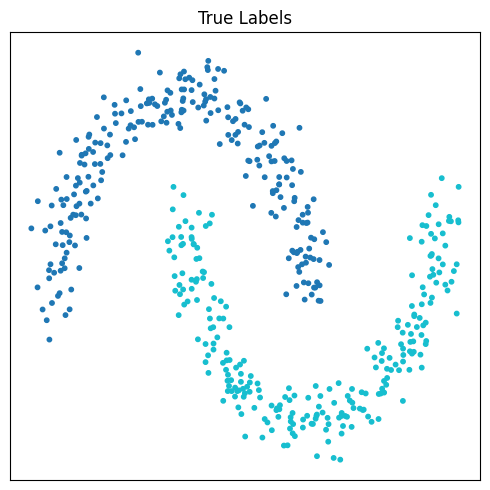

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), 
                         sharex=True)

axes.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=10)
axes.set_title("True Labels")
axes.set_xticks([])
axes.set_yticks([])


plt.tight_layout()
plt.show()

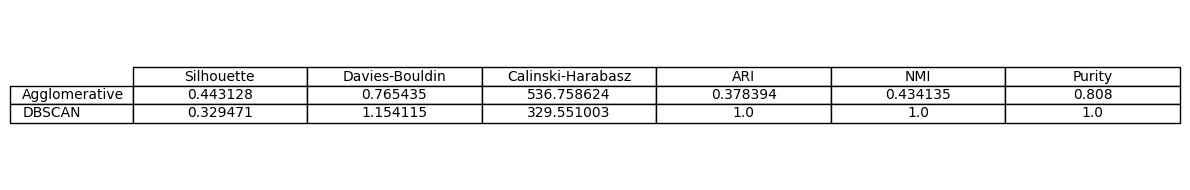

In [53]:
def purity_score(y_true, y_pred):
    matrix = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)


def evaluate_all(X, y_true, y_pred):
    sil = silhouette_score(X, y_pred)
    db = davies_bouldin_score(X, y_pred)
    ch = calinski_harabasz_score(X, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    purity = purity_score(y_true, y_pred)
    return {
        "Silhouette": sil,
        "Davies-Bouldin": db,
        "Calinski-Harabasz": ch,
        "ARI": ari,
        "NMI": nmi,
        "Purity": purity
    }

metrics_a = evaluate_all(X, y, pred_agglo)
metrics_d = evaluate_all(X, y, pred_dbscan)


results_df = pd.DataFrame([metrics_a, metrics_d], 
                          index=['Agglomerative', 'DBSCAN'])

fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('off')
tbl = ax.table(cellText=results_df.round(6).values,
               colLabels=results_df.columns,
               rowLabels=results_df.index,
               loc='center',
               cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.tight_layout()
plt.show()

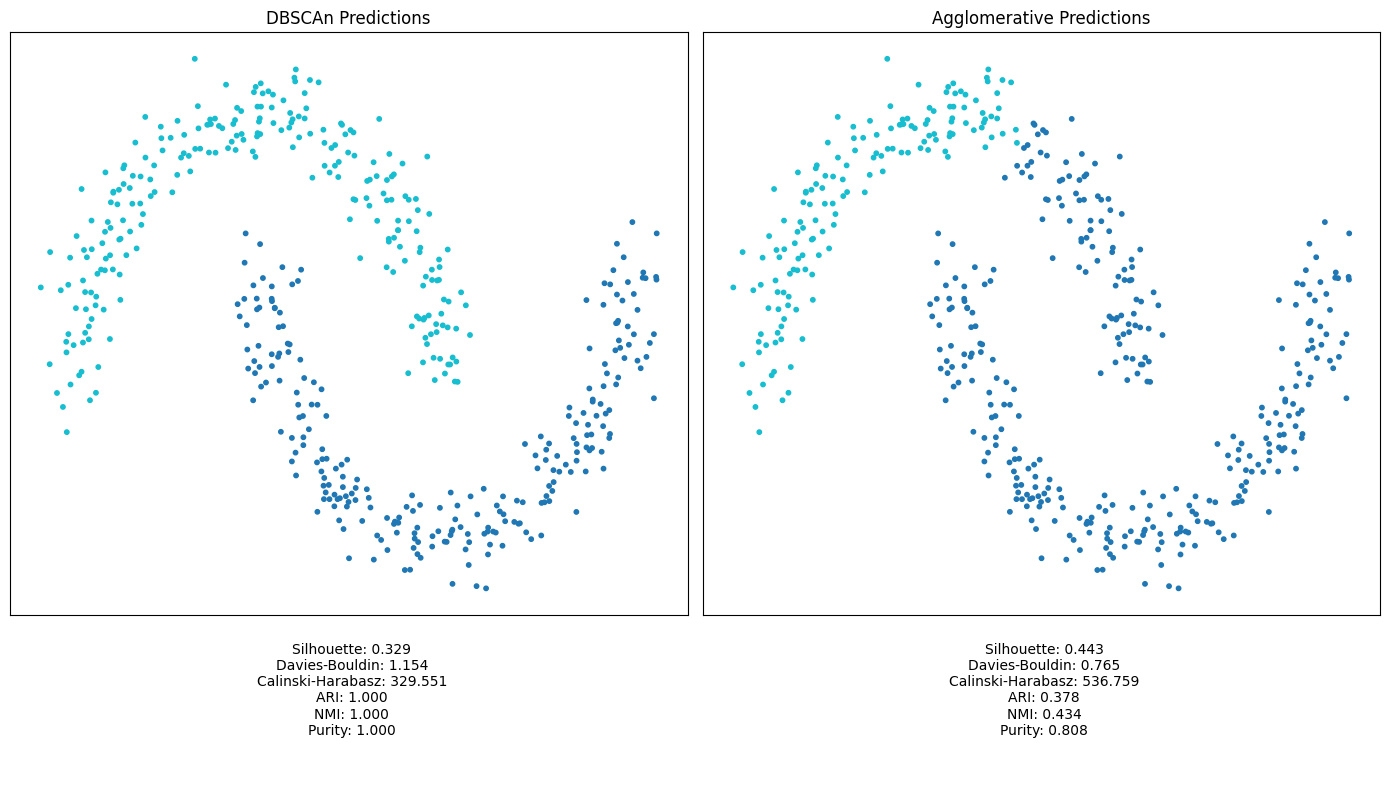

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=True)

axes[0, 0].scatter(X[:, 0], X[:, 1], c=pred_dbscan, cmap='tab10', s=10)
axes[0, 0].set_title("DBSCAn Predictions")

axes[0, 1].scatter(X[:, 0], X[:, 1], c=pred_agglo, cmap='tab10', s=10)
axes[0, 1].set_title("Agglomerative Predictions")

for ax in axes[0, :]:
    ax.set_xticks([])
    ax.set_yticks([])

labels = ["Silhouette", "Davies-Bouldin", "Calinski-Harabasz", "ARI", "F1", "NMI", "Purity"]

text_dbscan = "\n".join([f"{lbl}: {val:.3f}" for lbl, val in metrics_d.items()])
text_agglo = "\n".join([f"{lbl}: {val:.3f}" for lbl, val in metrics_a.items()])
 
axes[1, 0].axis('off')
axes[1,1].axis('off')

axes[1, 0].text(0.5, 0.5, text_dbscan, fontsize=10, ha='center', va='center')
axes[1, 1].text(0.5, 0.5, text_agglo, fontsize=10, ha='center', va='center')

plt.tight_layout()
plt.show()